In [1]:
import pandas as pd

In [3]:
births = pd.read_csv("births.csv")
print(births.head())
births['day'].fillna(0, inplace=True)
births['day'] = births['day'].astype(int)

   year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548


In [4]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
print(births.head())

   year  month  day gender  births  decade
0  1969      1    1      F    4046    1960
1  1969      1    1      M    4440    1960
2  1969      1    2      F    4454    1960
3  1969      1    2      M    4548    1960
4  1969      1    3      F    4548    1960


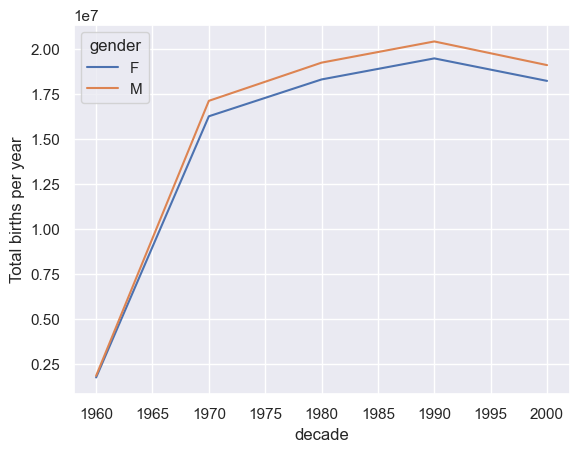

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
birth_decade = births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
birth_decade.plot()
plt.ylabel("Total births per year")
plt.show()

In [6]:
import numpy as np

quartiles = np.percentile(births['births'], [25, 50, 75])
mean = quartiles[1]
sigma = 0.74 * (quartiles[2] - quartiles[0])


In [7]:
births = births.query('(births > @mean - 5 * @sigma) & (births < @mean + 5 * @sigma)')
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day,
                              format='%Y%m%d')
births['day of week'] = births.index.dayofweek


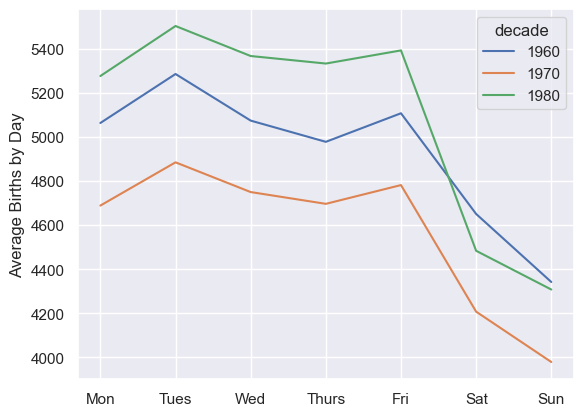

In [8]:
births_day = births.pivot_table('births', index='day of week',
                                columns='decade', aggfunc='mean')
births_day.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
births_day.plot()
plt.ylabel("Average Births by Day")
plt.show()

In [9]:
births_month = births.pivot_table('births', [births.index.month, births.index.day])
print(births_month.head())

births_month.index = [pd.datetime(2012, month, day)
                      for (month, day) in births_month.index]
print(births_month.head())

       births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625
              births
2012-01-01  4009.225
2012-01-02  4247.400
2012-01-03  4500.900
2012-01-04  4571.350
2012-01-05  4603.625


C:\Users\yasar\AppData\Local\Temp\ipykernel_1112\3416507701.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_month.index = [pd.datetime(2012, month, day)


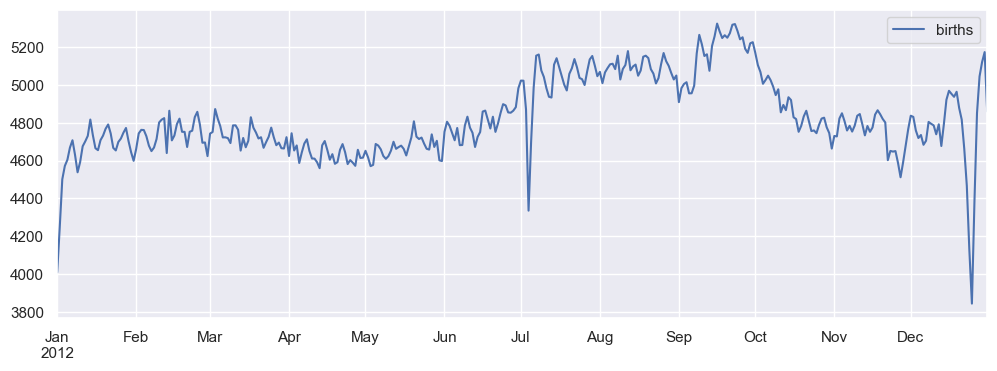

In [10]:
fig, ax = plt.subplots(figsize=(12, 4))
births_month.plot(ax=ax)
plt.show()